# Capstone Project
## Automatic Ticket Assignement
To build a classifier that can classify the tickets by analysing text.
### Dataset
Input Data Synthetic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read dataset

In [2]:
df = pd.read_excel("C:\\Users\\exsxaxr\\Downloads\\Input Data Synthetic.xlsx")

### EDA and Preprocessing

In [3]:
df['Assignment group'].value_counts(ascending=True)

GRP_64       1
GRP_70       1
GRP_61       1
GRP_67       1
GRP_35       1
          ... 
GRP_9      252
GRP_12     257
GRP_24     289
GRP_8      661
GRP_0     3975
Name: Assignment group, Length: 74, dtype: int64

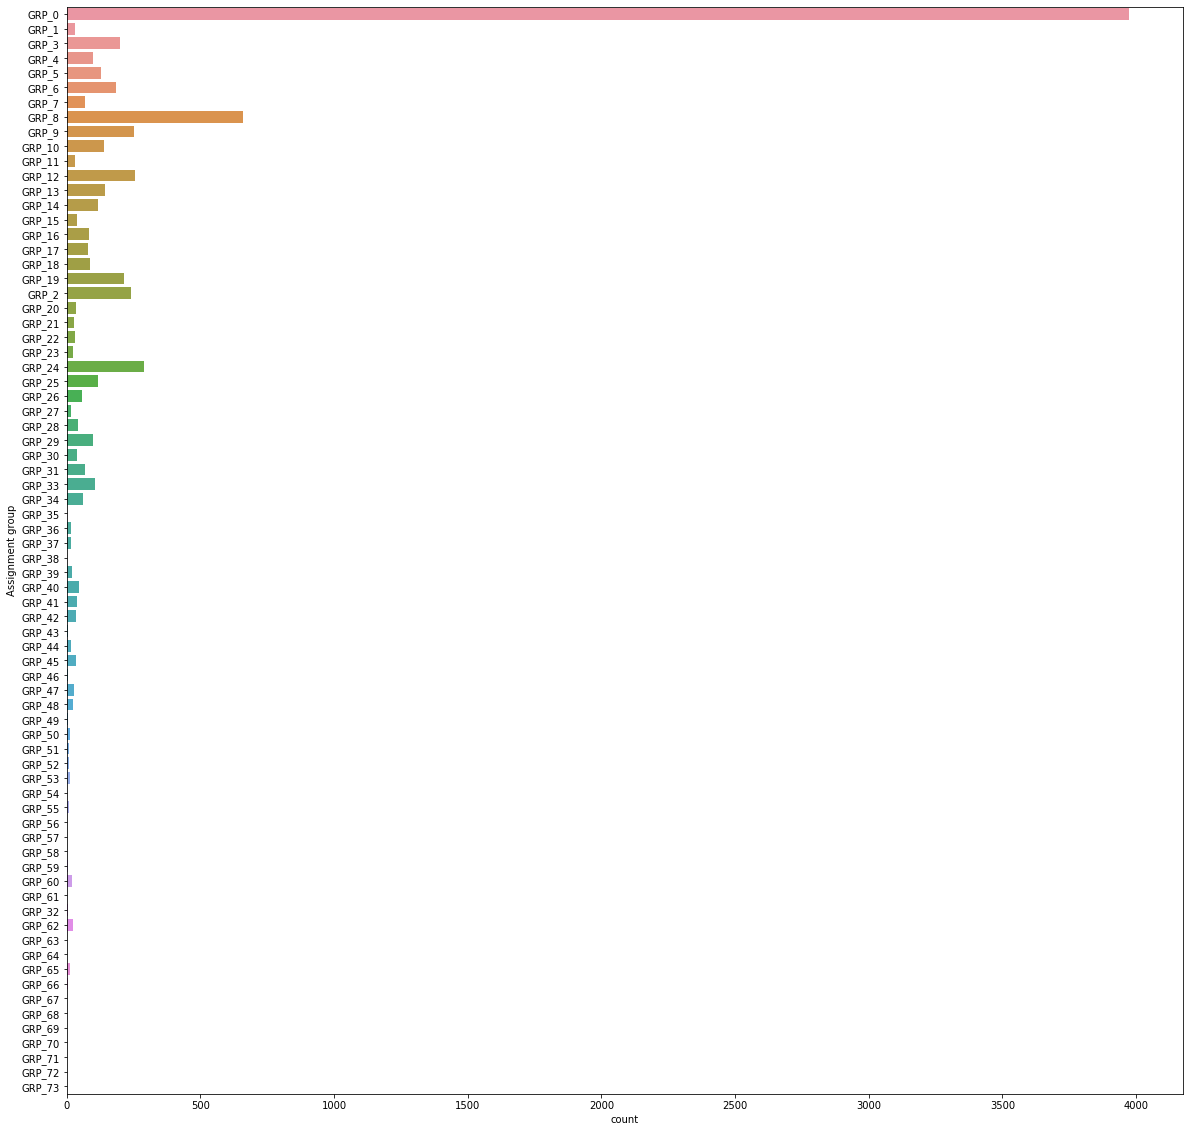

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Assignment group'])

In [3]:
# Drop irrelevant columns

df = df.drop(['Caller'], axis=1)

In [4]:
# Replace NAN with any stop word

df['Short description'].fillna('the', inplace=True)

In [5]:
# Convert categories into unique codes

df['Category'] = df['Assignment group'].astype('category').cat.codes

In [6]:
df = df.drop(['Assignment group'], axis=1)

In [7]:
df.head()

,Short description,Description,Category
0,login issue,-verified user details.(employee# & manager na...,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0


In [8]:
# Remove email id from description

import re
df['Description'] = df['Description'].apply((lambda x: re.sub('received from:.\S+@\S+','',x)))

In [9]:
# Remove words that are not relevant

df['Description'] = df['Description'].apply((lambda x: re.sub('hi|hello|team|thanks','',x)))

In [10]:
# Change to lowercase
df['Short description'] = df['Short description'].map(lambda x: x.lower())
df['Description'] = df['Description'].map(lambda x: x.lower())

In [11]:
df.head()

,Short description,Description,Category
0,login issue,-verified user details.(employee# & manager na...,0
1,outlook,"\r\n\r\n\r\n\r\n ,\r\n\r\nmy meetings/skype me...",0
2,cant log in to vpn,\r\n\r\n\r\n\r\n\r\n\r\ni cannot log on to vpn...,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0


In [12]:
# Remove numbers

import re

df['Short description'] = df['Short description'].map(lambda x: re.sub(r'\d+', '', x))
df['Description'] = df['Description'].map(lambda x: re.sub(r'\d+', '', x))

In [13]:
df.head()

,Short description,Description,Category
0,login issue,-verified user details.(employee# & manager na...,0
1,outlook,"\r\n\r\n\r\n\r\n ,\r\n\r\nmy meetings/skype me...",0
2,cant log in to vpn,\r\n\r\n\r\n\r\n\r\n\r\ni cannot log on to vpn...,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0


In [14]:
# Remove Punctuation

import string

df['Short description']  = df['Short description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
df['Description']  = df['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [15]:
df.head()

,Short description,Description,Category
0,login issue,verified user detailsemployee manager name\r\...,0
1,outlook,\r\n\r\n\r\n\r\n \r\n\r\nmy meetingsskype meet...,0
2,cant log in to vpn,\r\n\r\n\r\n\r\n\r\n\r\ni cannot log on to vpn...,0
3,unable to access hrtool page,unable to access hrtool page,0
4,skype error,skype error,0


In [16]:
# Remove white spaces

df['Short description'] = df['Short description'].map(lambda x: x.strip())
df['Description'] = df['Description'].map(lambda x: x.strip())

In [17]:
df.head()

,Short description,Description,Category
0,login issue,verified user detailsemployee manager name\r\...,0
1,outlook,my meetingsskype meetings etc are not appearin...,0
2,cant log in to vpn,i cannot log on to vpn\r\n\r\nbest,0
3,unable to access hrtool page,unable to access hrtool page,0
4,skype error,skype error,0


In [18]:
df['Description'] = df['Description'].astype(str)

In [19]:
df_description = df.Description.values

In [20]:
from nltk import word_tokenize

df['Short description'] = df['Short description'].map(lambda x: word_tokenize(x))
df['Description'] = df['Description'].map(lambda x: word_tokenize(x))

In [21]:
df.head()

,Short description,Description,Category
0,"[login, issue]","[verified, user, detailsemployee, manager, nam...",0
1,[outlook],"[my, meetingsskype, meetings, etc, are, not, a...",0
2,"[cant, log, in, to, vpn]","[i, can, not, log, on, to, vpn, best]",0
3,"[unable, to, access, hrtool, page]","[unable, to, access, hrtool, page]",0
4,"[skype, error]","[skype, error]",0


In [22]:
# filter out stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Short description'] = df['Short description'].map(lambda x: [w for w in x if not w in stop_words])
df['Description'] = df['Description'].map(lambda x: [w for w in x if not w in stop_words])

In [23]:
df.head()

,Short description,Description,Category
0,"[login, issue]","[verified, user, detailsemployee, manager, nam...",0
1,[outlook],"[meetingsskype, meetings, etc, appearing, outl...",0
2,"[cant, log, vpn]","[log, vpn, best]",0
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",0
4,"[skype, error]","[skype, error]",0


In [24]:
# Word Lemmatization

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Short description'] = df['Short description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
df['Description'] = df['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

In [25]:
df.head()

,Short description,Description,Category
0,"[login, issue]","[verify, user, detailsemployee, manager, name,...",0
1,[outlook],"[meetingsskype, meet, etc, appear, outlook, ca...",0
2,"[cant, log, vpn]","[log, vpn, best]",0
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",0
4,"[skype, error]","[skype, error]",0


In [26]:
from wordcloud import WordCloud

val = str(df_description)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(val)

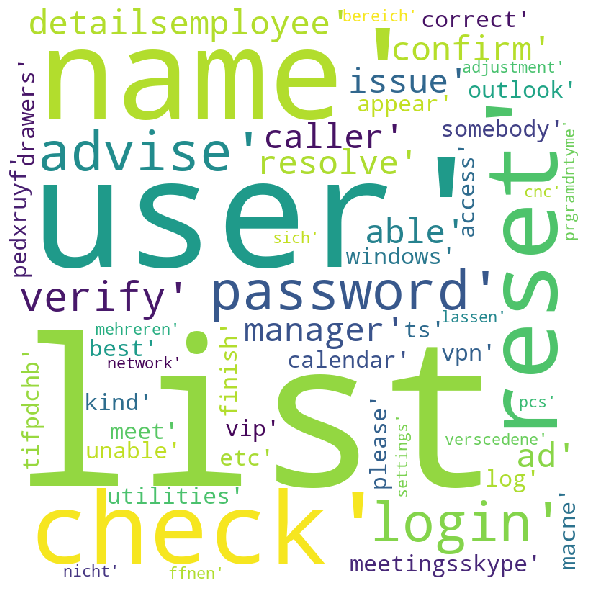

In [27]:
# plot the WordCloud image       

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
df.head()

,Short description,Description,Category
0,"[login, issue]","[verify, user, detailsemployee, manager, name,...",0
1,[outlook],"[meetingsskype, meet, etc, appear, outlook, ca...",0
2,"[cant, log, vpn]","[log, vpn, best]",0
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",0
4,"[skype, error]","[skype, error]",0


In [29]:
# Turn lists back to string

df['Short description'] = df['Short description'].map(lambda x: ' '.join(x))
df['Description'] = df['Description'].map(lambda x: ' '.join(x))

In [30]:
# Concatenate short description and description columns

df['Description'] = df['Short description'].str.cat(df['Description'], sep =" ")

In [31]:
df = df.drop(['Short description'], axis=1)

In [32]:
# Find length of the words in description

df['Desc_len'] = df['Description'].apply(lambda x: len(x.split(" ")))

In [33]:
df.head()

,Description,Category,Desc_len
0,login issue verify user detailsemployee manage...,0,23
1,outlook meetingsskype meet etc appear outlook ...,0,13
2,cant log vpn log vpn best,0,6
3,unable access hrtool page unable access hrtool...,0,8
4,skype error skype error,0,4


In [34]:
# Find maxlen 

df['Desc_len'].max()

901

### Tokenize into words

In [35]:
import nltk
from nltk.tokenize import word_tokenize

desc = df.Description.str.cat(sep=' ')

tokens = word_tokenize(desc)

vocabulary = set(tokens)
print(len(vocabulary))

15866


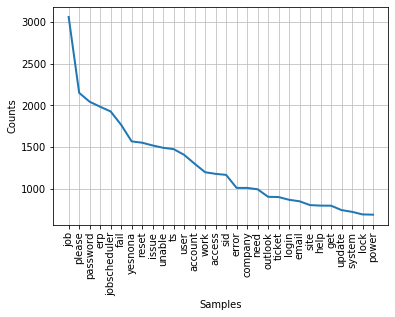

In [36]:
from nltk.probability import FreqDist

frequency_dist = nltk.FreqDist(tokens)
#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

frequency_dist.most_common(5)

import matplotlib.pyplot as plt
frequency_dist.plot(30,cumulative=False)
plt.show()

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_features = 16000
maxlen = 900
embedding_size = 200
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Description'].values)

### Define X and Y

In [38]:
X = tokenizer.texts_to_sequences(df['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = pd.get_dummies(df['Category']).values

print('Shape of data:', X.shape)
print('Shape of label:', y.shape)

Shape of data: (8499, 900)
Shape of label: (8499, 74)


In [39]:
# Splitting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 42)

### Word Embeddings using Glove Embedding file

In [40]:
EMBEDDING_FILE = 'C:\\Users\\exsxaxr\\Downloads\\glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Weight matrix

In [41]:
embedding_matrix = np.zeros((max_features, 200))

for word, i in tokenizer.word_index.items():
  if i >= max_features:
        continue
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

### Model building

In [42]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential

lstm_out = 128

# Define LSTM Model

model = Sequential()
model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         3200000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 200)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 74)                7474      
Total params: 3,327,874
Trainable params: 3,327,874
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# Training LSTM Model

from keras.callbacks import ModelCheckpoint

epochs = 10
batch_size = 64

filepath="C:\\Users\\exsxaxr\\Downloads\\weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 5736 samples, validate on 638 samples
Epoch 1/10


Using TensorFlow backend.


5736/5736 [==============================] - 412s 72ms/sample - loss: 2.5515 - accuracy: 0.4976 - val_loss: 2.0310 - val_accuracy: 0.5564
Epoch 2/10
5736/5736 [==============================] - 534s 93ms/sample - loss: 1.9238 - accuracy: 0.5640 - val_loss: 1.8152 - val_accuracy: 0.5674
Epoch 3/10
5736/5736 [==============================] - 819s 143ms/sample - loss: 1.7317 - accuracy: 0.5818 - val_loss: 1.7162 - val_accuracy: 0.5799
Epoch 4/10
5736/5736 [==============================] - 828s 144ms/sample - loss: 1.5773 - accuracy: 0.6104 - val_loss: 1.5911 - val_accuracy: 0.5987
Epoch 5/10
5736/5736 [==============================] - 839s 146ms/sample - loss: 1.4259 - accuracy: 0.6353 - val_loss: 1.5325 - val_accuracy: 0.6129
Epoch 6/10
5736/5736 [==============================] - 841s 147ms/sample - loss: 1.2928 - accuracy: 0.6635 - val_loss: 1.4752 - val_accuracy: 0.6238
Epoch 7/10
5736/5736 [==============================] - 857s 149ms/sample - loss: 1.1662 - accuracy: 0.6956 - val

### Training v/s Validation accuracy

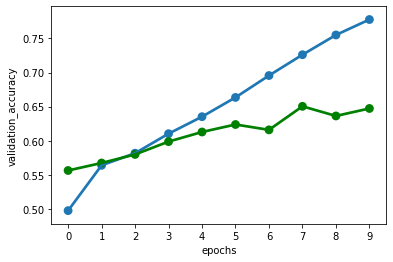

In [44]:
df_1 = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy']})
g = sns.pointplot(x="epochs", y="accuracy", data=df_1, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df_1, fit_reg=False, color='green')

In [65]:
predicted = model.predict(X_test)
predicted

array([[1.2055051e-04, 6.5160105e-03, 2.5686450e-02, ..., 1.2845685e-06,
        3.6710721e-01, 2.5790611e-01],
       [2.3686720e-02, 1.8431346e-03, 6.5309681e-02, ..., 7.8929792e-05,
        1.4168709e-02, 5.4867562e-02],
       [6.7488164e-02, 2.5365336e-03, 4.7652627e-04, ..., 7.7280158e-04,
        1.8641846e-02, 3.0814095e-03],
       ...,
       [9.1707581e-01, 4.1065785e-05, 1.5675175e-04, ..., 1.3663125e-04,
        4.9320272e-05, 9.6773950e-04],
       [9.8745805e-01, 8.5182091e-07, 3.3479373e-05, ..., 2.5986084e-05,
        3.2189414e-06, 2.4710887e-04],
       [1.3323718e-04, 4.9820398e-03, 2.8201029e-02, ..., 1.0809608e-06,
        4.8624650e-01, 2.5065523e-01]], dtype=float32)

In [66]:
predicted = np.argmax(predicted, axis=1)

In [70]:
Y_1 = np.argmax(Y_test, axis=1)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_1, predicted))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       989
           1       0.00      0.00      0.00         8
           2       0.68      0.36      0.47        36
           3       0.00      0.00      0.00         9
           4       0.47      0.69      0.56        51
           5       0.28      0.47      0.35        34
           6       0.28      0.27      0.27        26
           7       0.10      0.33      0.15         6
           8       0.10      0.20      0.13        20
           9       0.92      0.96      0.94        24
          10       0.18      0.21      0.20        19
          11       0.32      0.37      0.34        57
          12       0.32      0.45      0.37        58
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         7
          17       0.80    

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
